In [156]:
import pandas as pd
import requests
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import numpy as np

from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random

In [77]:
# pull last 5 years of IBM stock data

r = requests.get('https://www.quandl.com/api/v3/datasets/YAHOO/IBM.json?api_key=mRCbnLJ24-otJwQ_V6Qt&start_date=2012-02-21')
column_names = r.json()['dataset']['column_names']
# get data and turn it into a numpy array
data = r.json()['dataset']['data']
data = [row[4] for row in data]
data = np.array(data)
print('IBM closing price for past 5 years:')
print(data)
print('{} sessions'.format(data.size))

IBM closing price:
[ 180.259995  180.669998  181.429993 ...,  197.610001  193.869995
  193.389999]
1259 sessions.


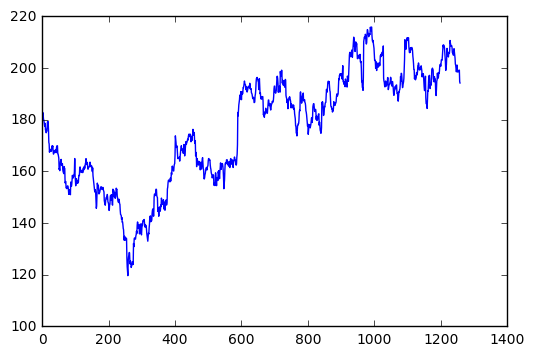

In [72]:
plt.plot(data)

In [177]:
# create genetic models

# -1 will be sell points, 0 will be hold points, 1 will by buy points. algo will evolve to generate the most
# profitable buy and sell points in a stock. fitness will be evaluated on a first in, first out manner.

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_int", random.randint, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_int, n=data.size)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [178]:
# generate an example individual

ind1 = toolbox.individual()
print (ind1)

[-1, -1, 0, 1, -1, 1, -1, 0, 0, 0, -1, 1, 1, -1, 1, 0, -1, 1, 0, -1, 1, 1, 0, -1, -1, 0, -1, -1, 0, -1, 0, 0, 0, 1, -1, 0, 0, -1, 0, 0, -1, -1, 0, -1, 0, 1, 1, 1, 0, 1, 1, 1, 0, -1, 1, 1, -1, 0, -1, 1, -1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, -1, 0, 1, 1, 1, -1, 0, 1, 1, 0, -1, -1, -1, -1, -1, -1, 0, 1, -1, 0, 1, -1, 1, -1, -1, 0, 1, -1, -1, 0, 0, 1, 1, 1, 1, 1, 0, -1, 1, -1, 1, 1, 0, 0, 0, -1, 0, 1, 1, -1, -1, 0, 0, -1, 1, 1, 0, 0, -1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 1, -1, -1, 1, -1, 1, 0, -1, 0, 0, 0, -1, 0, -1, -1, -1, -1, -1, 0, 0, 0, -1, 1, 0, -1, -1, 0, -1, 0, -1, 1, 1, 1, -1, 0, 0, -1, 0, -1, -1, -1, 0, -1, 1, 0, 1, 0, -1, 1, 0, -1, 0, -1, -1, -1, 1, 0, 1, 1, 0, 1, 1, -1, 1, -1, 0, -1, 0, -1, 1, 1, 1, 1, 0, -1, 0, 0, 1, 0, 0, 0, 1, 0, -1, -1, 0, 0, 0, -1, 1, -1, 1, 1, -1, -1, 0, 0, -1, 0, 1, 1, -1, -1, -1, 1, 0, -1, -1, -1, 1, -1, 1, 1, -1, -1, 0, 1, 0, -1, 0, 0, 0, -1, -1, 1, 1, 1, 0, 1, 1, 0, -1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 0, 0, 0, -1, -1, -1, -1, 0, 0, 1, 0, 1, 0, -1, 1, 1

In [179]:
# create seperate lists to know where to mark each buy and sell point on the data
buy_markers = [i for i, x in enumerate(ind1) if x == 1]
sell_markers = [i for i, x in enumerate(ind1) if x == -1]
print (buy_markers)
print (sell_markers)

[3, 5, 11, 12, 14, 17, 20, 21, 33, 45, 46, 47, 49, 50, 51, 54, 55, 59, 64, 65, 66, 70, 73, 74, 75, 78, 79, 88, 91, 93, 97, 102, 103, 104, 105, 106, 109, 111, 112, 118, 119, 125, 126, 130, 142, 145, 147, 164, 172, 173, 174, 185, 187, 190, 197, 199, 200, 202, 203, 205, 211, 212, 213, 214, 219, 223, 231, 233, 234, 241, 242, 246, 251, 253, 254, 258, 266, 267, 268, 270, 271, 274, 275, 276, 277, 280, 292, 294, 297, 298, 302, 305, 308, 311, 312, 315, 316, 317, 321, 324, 325, 326, 329, 330, 332, 335, 336, 339, 342, 344, 345, 346, 351, 353, 355, 357, 358, 359, 360, 362, 365, 372, 375, 378, 379, 381, 383, 385, 386, 387, 389, 392, 394, 395, 399, 405, 409, 411, 412, 414, 415, 418, 426, 428, 430, 433, 436, 439, 444, 454, 459, 461, 462, 463, 465, 471, 473, 479, 481, 487, 488, 489, 494, 496, 499, 500, 501, 504, 510, 511, 512, 514, 527, 530, 532, 534, 536, 544, 548, 557, 558, 559, 568, 569, 570, 573, 575, 576, 577, 583, 590, 591, 592, 596, 598, 599, 600, 602, 610, 611, 615, 618, 619, 622, 624, 628, 62

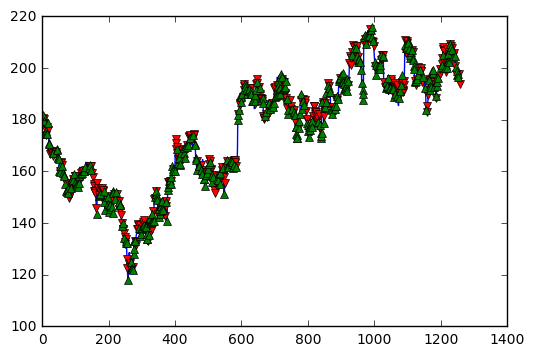

In [180]:
# what a generation 0 random individual looks like currently

plt.plot(data)
plt.plot(data, color='r', marker='v', markevery=sell_markers, linewidth=0)
plt.plot(data, color='g', marker='^', markevery=buy_markers, linewidth=0)

In [186]:
# the evaluation function will only calculate long trades
# short trades will 'sell' stock if they are available
# the trade at index 0 will always be sold on a short trade

commission_cost = 2.99

def evalFitness(individual):
    trades = []
    profit = 0
    for i in range(data.size):
        if individual[i] == 1:
            trades.append(data[i])
            profit -= commission_cost
        if individual[i] == -1:
            if len(trades) > 0:
                profit += (data[i] - trades[0]) - commission_cost
    return (profit,)

In [187]:
# testing our randomly generated individual.
# it's going to be a crappy individual to start off
print (evalFitness(ind1))

(-5169.1871209999345,)


In [231]:
# set up genetic operators for evolution of the population
toolbox.register("evaluate", evalFitness)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)

In [232]:
# evolve!

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=400, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg     	std    	min     	max     
0  	300   	-4616.28	699.733	-6094.43	-1589.17
1  	165   	-3962.55	740.533	-5653.13	-1486.7 
2  	197   	-3249.68	811.532	-5093.41	-927.647
3  	166   	-2513.11	650.169	-4898.08	-476.401
4  	181   	-1953.73	499.732	-3332.7 	-375.781
5  	192   	-1551.43	466.65 	-2509.49	342.399 
6  	183   	-1139.93	512.544	-2208.98	1760    
7  	183   	-677.576	701.845	-2381.95	2483.17 
8  	181   	-88.7031	854.867	-1739.12	2708.33 
9  	184   	594.184 	769.388	-1281.88	2708.33 
10 	171   	1233.44 	803.731	-449.101	2986.04 
11 	164   	1917.84 	626.323	-70.831 	2995.19 
12 	170   	2359.51 	304.552	1129.75 	2995.19 
13 	177   	2570.58 	219.468	1891.51 	3265.3  
14 	186   	2717.57 	185.456	2211.22 	3249.5  
15 	186   	2829.65 	195.686	1905.94 	3406.31 
16 	176   	2959.72 	198.741	1708.72 	3678.88 
17 	194   	3062.36 	225.176	1782.08 	3681.93 
18 	188   	3172.13 	270.404	1451.38 	3689.24 
19 	188   	3309.62 	238.046	2162.23 	3808.56 
20 	206   	3429.57 	244.918	1906.7

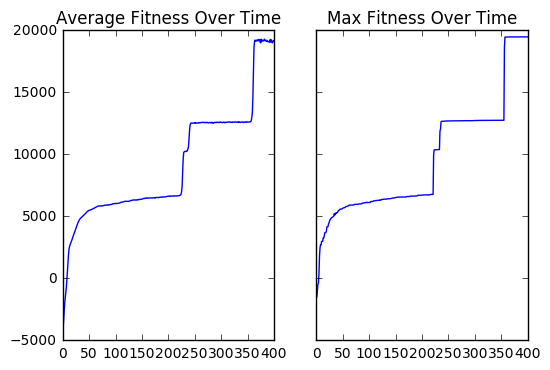

In [233]:
# plot results
avg = log.select('gen', 'avg')
max = log.select('gen', 'max')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(avg[0], avg[1])
ax1.set_title('Average Fitness Over Time')
ax2.set_title('Max Fitness Over Time')
ax2.plot(max[0], max[1])

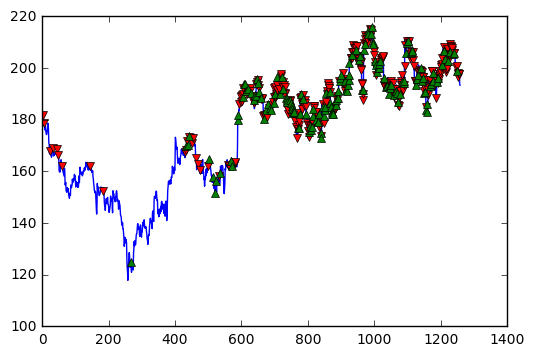

In [234]:
# plot the best organism and see how it did compared to the randomly generated one

best_ind = tools.selBest(pop, 1)[0]

buy_markers = [i for i, x in enumerate(best_ind) if x == 1]
sell_markers = [i for i, x in enumerate(best_ind) if x == -1]

plt.plot(data)
plt.plot(data, color='r', marker='v', markevery=sell_markers, linewidth=0)
plt.plot(data, color='g', marker='^', markevery=buy_markers, linewidth=0)

In [ ]:
# still a lot of work to be done, but you can start to see that a pattern is forming, especially when buying near
# the bottom peak at the 300th session. running this for a long time should reveal better results